## Reference on test images based on SSD_MobileNetV2 

In [1]:
import tensorflow as tf
print(tf.__version__)

import os
os.environ['PYTHONPATH'] += ':/home/kang/Documents/py/models/research/:/home/kang/Documents/py/models/research/slim/'



1.9.0


## frozen the model
train around 15000 iterations

In [ ]:
%cd /home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/model

lst = os.listdir('sim_model')
lf = filter(lambda k: 'model.ckpt-' in k, lst)
last_model = sorted(lf)[-1].replace('.meta', '')


!python /home/kang/Documents/py/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/model/ssd_mobilenetV2_finetune_traffic_light_simu.config \
    --output_directory=sim_model/fine_tuned_model \
    --trained_checkpoint_prefix=sim_model/$last_model


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageDraw
from PIL import ImageColor

from glob import glob

import sys
sys.path.append('/home/kang/Documents/py/models/research/object_detection')
sys.path.append('/home/kang/Documents/py/models/research')

from utils import label_map_util
from utils import visualization_utils as vis_util

%matplotlib inline

In [4]:

SSD_GRAPH_FILE = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/model/sim_model/fine_tuned_model/frozen_inference_graph.pb'

PATH_TO_LABELS = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/traffic_light_detection_dataset/udacity_label_map.pbtxt'
NUM_CLASSES = 4


In [5]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [6]:
detection_graph = load_graph(SSD_GRAPH_FILE)

In [7]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


num_detections can be changed in the configure file, default is 100 

SCORES
(1, 100)
CLASSES
(1, 100)


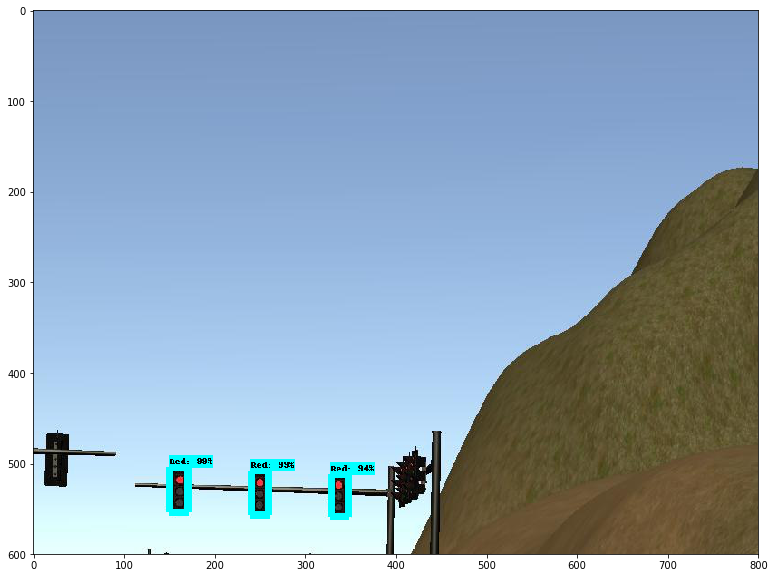

SCORES
(1, 100)
CLASSES
(1, 100)


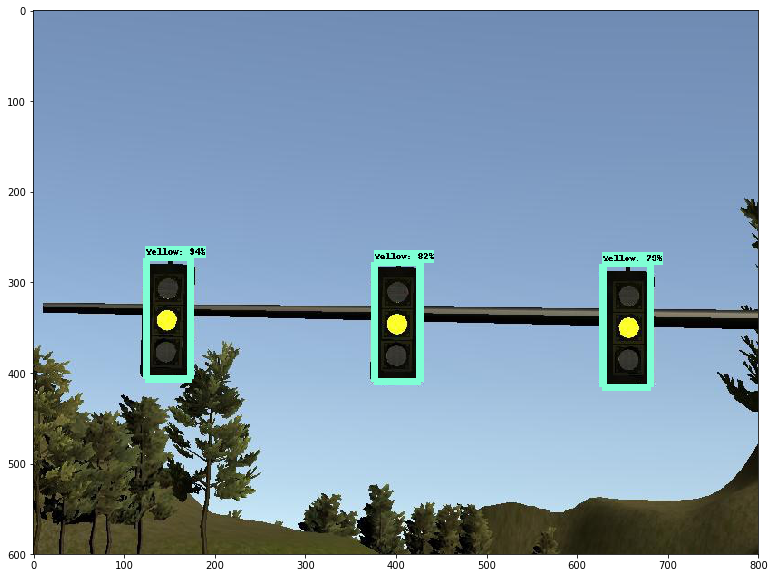

SCORES
(1, 100)
CLASSES
(1, 100)


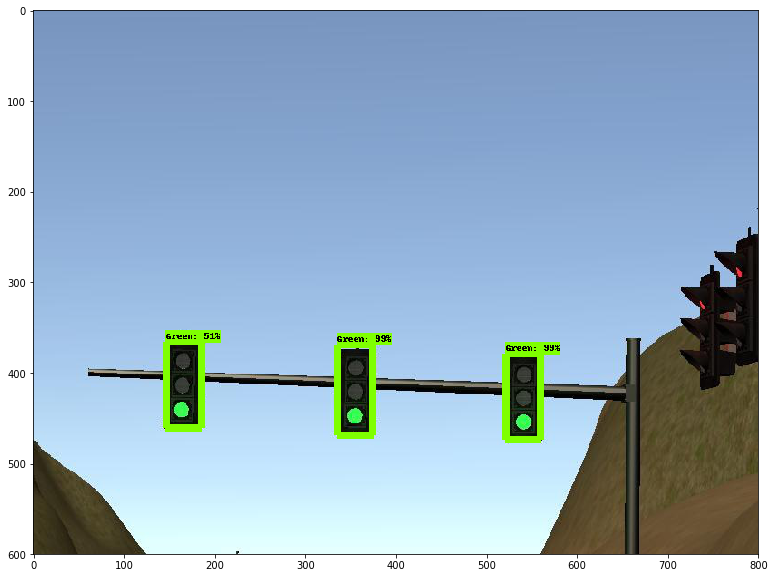

In [8]:
PATH_TO_IMGS = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/traffic_light_detection_dataset/test_imgs'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.jpg'))
IMAGE_SIZE = (15, 10)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores.shape)
            print('CLASSES')
            print(classes.shape)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break
